In [1]:
%load_ext autoreload
%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [67]:
%autoreload 2
from Logic.network_manager import NetworkManager
from Logic.meta_network import MetaNetworkManager
from Logic.generation_db_and_manager import *
from Logic.variations_creator import *
from Logic.bpy_connector import generate_image, check_nm_not_empty
from Logic.utils import compare_dicts, is_empty_image

In [3]:
path = '/Users/orenm/BlenderShaderProject/data/'
images_path = os.path.join(path, 'images/')
db_path = os.path.join(path, 'DB/')

In [71]:
max_layers = 1
n_additions = 1
kwargs = {'max_layers': max_layers, 'n_additions': n_additions}
make_initial_func = mega_nodes

max_layers = 2
n_additions = 3
kwargs = {'max_layers': max_layers, 'n_additions': n_additions}
make_initial_func = regular_meta_nodes

n_additions = 4
kwargs = {'n_additions': n_additions}
make_initial_func = completely_random_generation

In [72]:
structural_changes = [add_random_node_on_edge, add_random_edge, remove_random_edge, remove_random_node]
to_nothing_variation
change_seed
change_numeric
change_params

<function Logic.generation_db_and_manager.change_params(nm, n_changes=3)>

In [96]:
db_manager = DBManager()

In [97]:
cluster_base = make_cluster_base(make_initial_func, kwargs)
new_cluster_id = db_manager.add_cluster(cluster_base)
empty_network_variation = to_nothing_variation(cluster_base)
db_manager.add_sequence(new_cluster_id, empty_network_variation)

Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)


In [8]:
# funcs return if it is possible - and check it and print it if didn't create variation

In [121]:
some_node = np.random.choice(list(db_manager.network_managers))

current_node = some_node

orig_copy = db_manager.network_managers[some_node].copy()
edges_data = []
for _ in range(5):
    print(current_node)
    # Get incoming edges for the current node
    outgoing_edges = list(db_manager.network.out_edges(current_node, data=True))
    # Pick a random incoming edge
    edge = outgoing_edges[np.random.randint(len(outgoing_edges))]
    edges_data.append(edge)  # Save edge (source, target, data)
    # Move to the new node
    current_node = edge[1]  # The source of the edge becomes the new node

    nm_after =  db_manager.network_managers[current_node]

    print(current_node)
    variation = VariationDescriptor(edge[2]['variation_type'], edge[2]['step'])
    apply_variation(orig_copy, variation)
    assert NetworkManager.compare_networks(orig_copy, nm_after)

16
0
0
1
1
2
2
3
3
4


In [95]:
db_manager.save(db_path, overwrite=True)
new_db = DBManager.load(db_path)
assert db_manager.network.nodes(data=True) == new_db.network.nodes(data=True)
a = list(db_manager.network.edges(data=True))
b = list(new_db.network.edges(data=True))
assert compare_dicts(a, b)

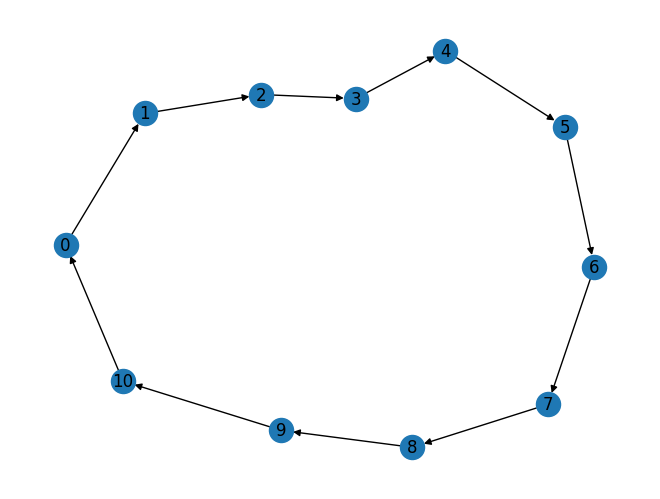

In [83]:
db_manager.draw_network()

In [98]:
images_to_generate = db_manager.get_nodes_with_attribute('has_image', False)
for node_id in images_to_generate:
    nm = db_manager.network_managers[node_id]
    img_path = os.path.join(images_path, f'{node_id}.png')
    generate_image(nm, img_path)
    assert os.path.exists(img_path)
    db_manager.set_node_attribute(node_id, 'has_image', True)
    is_empty = bool(is_empty_image(img_path))  # bool to convert from np.bool_
    db_manager.set_node_attribute(node_id, 'is_empty_image', is_empty)

Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
Info: Deleted 3 data-block(s)
